### Using the icf pairs but converting the Morgan fingerprint sets into a difference between target-analogues

Creating a dataset where the target-analogue difference forms the feature vector to afford a routine classification problem to be explored instead of pairs learning that requires a great deal of optimisation.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from rdkit import Chem
from rdkit.Chem import AllChem
import openpyxl
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
processed_dir = TOP + 'data/processed/'
interim_dir = TOP +'data/interim/'
figures_dir = TOP + 'reports/figures/'

In [4]:
df = pd.read_csv(interim_dir+'balanced_df_icf_140424.csv', index_col = [0])
df

,Target,Analogue,Label,analogue_smi,target_smi,analogue_mol,target_mol,fps_target,fps_analogue,tanimoto,Euclidean
94147,DTXSID60626563,DTXSID6044068,1,CC1=C(C=C(C=C1N)[N+]([O-])=O)[N+]([O-])=O,CCCCCCC1=CC(=C(O)C(=C1)C(C)(C)C)C(C)(C)C,<rdkit.Chem.rdchem.Mol object at 0x7905c53ee3c0>,<rdkit.Chem.rdchem.Mol object at 0x7905c5311040>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.064516,7.615773
20729,DTXSID7027255,DTXSID1024621,1,COCCOCCOC,C\C=C\C,<rdkit.Chem.rdchem.Mol object at 0x7905c53ee430>,<rdkit.Chem.rdchem.Mol object at 0x7905c5311120>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.058824,4.000000
136459,DTXSID0074716,DTXSID9026714,0,CCCC(C)CO,CCCC(CO)CCC,<rdkit.Chem.rdchem.Mol object at 0x7905c53ee2e0>,<rdkit.Chem.rdchem.Mol object at 0x7905c53110b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.454545,3.464102
26548,DTXSID10497003,DTXSID0044571,0,CC(C)C1=CC=CC(O)=C1,CC(C)CC1=CC(O)=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7905c53ee510>,<rdkit.Chem.rdchem.Mol object at 0x7905c5311190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.394737,4.795832
12767,DTXSID6022000,DTXSID8020044,1,OCC=C,NCCO,<rdkit.Chem.rdchem.Mol object at 0x7905c53ee580>,<rdkit.Chem.rdchem.Mol object at 0x7905c5311200>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.214286,3.316625
...,...,...,...,...,...,...,...,...,...,...,...
122681,DTXSID3021982,DTXSID9021764,1,CC(O)CN,CCCCOC(C)=O,<rdkit.Chem.rdchem.Mol object at 0x7905c5310dd0>,<rdkit.Chem.rdchem.Mol object at 0x7905c52a7b30>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.142857,4.898979
133571,DTXSID60193725,DTXSID9046526,1,CCOC(=O)C1=CN=CC=C1,CCCCC1=CC(O)=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7905c5310e40>,<rdkit.Chem.rdchem.Mol object at 0x7905c52a7ba0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.140351,7.000000
79999,DTXSID2028985,DTXSID0020440,1,CC(OC1=C(Cl)C=C(Cl)C=C1)C(O)=O,CC(C)(C1=CC=CC=C1)C1=CC(N2N=C3C=CC=CC3=N2)=C(O...,<rdkit.Chem.rdchem.Mol object at 0x7905c5310eb0>,<rdkit.Chem.rdchem.Mol object at 0x7905c52a7c10>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.098765,8.544004
20173,DTXSID00285658,DTXSID0022480,1,CCC1=CC=CC(O)=C1,CCCCCCCCCCCC(=O)OCCC1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7905c5310f20>,<rdkit.Chem.rdchem.Mol object at 0x7905c52a7c80>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.186441,6.928203


In [5]:
df['analogue_mol'] = [Chem.MolFromSmiles(e) for e in df['analogue_smi']]

df['target_mol'] = [Chem.MolFromSmiles(e) for e in df['target_smi']]

In [6]:
df['fp_target'] = [np.array(AllChem.GetMorganFingerprintAsBitVect(i,3,1024)) for i in df['target_mol']]
df['fp_analogue'] = [np.array(AllChem.GetMorganFingerprintAsBitVect(i,3,1024)) for i in df['analogue_mol']]

In [7]:
df['fp_diff'] = df[['fp_target', 'fp_analogue']].apply(lambda x: np.abs(x['fp_target'] -x['fp_analogue']), axis = 1)

In [8]:
df['fp_diff'].iloc[0]

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
df['label'] = df['Label'].apply(lambda x: 1 if x == 0 else -1)

In [10]:
df['label'].value_counts()

-1    2715
 1    2715
Name: label, dtype: int64

<Axes: >

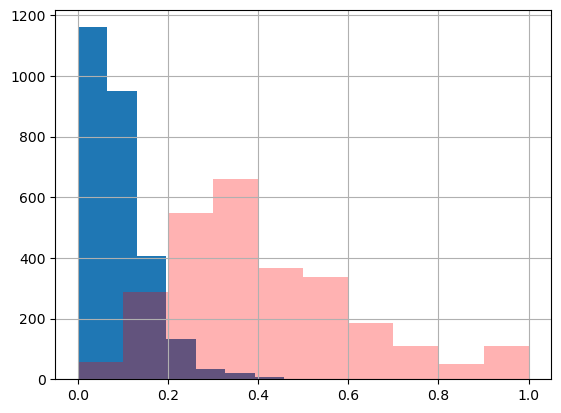

In [11]:
df[df['label'] ==-1]['tanimoto'].hist()
df[df['label'] ==1]['tanimoto'].hist(color = 'r', alpha = 0.3)

In [12]:
from metric_learn import ITML_Supervised
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from metric_learn import NCA


clf = make_pipeline(NCA(), KNeighborsClassifier())


In [13]:
X = df['fp_diff'].values
y = df['label'].values

In [14]:
df

,Target,Analogue,Label,analogue_smi,target_smi,analogue_mol,target_mol,fps_target,fps_analogue,tanimoto,Euclidean,fp_target,fp_analogue,fp_diff,label
94147,DTXSID60626563,DTXSID6044068,1,CC1=C(C=C(C=C1N)[N+]([O-])=O)[N+]([O-])=O,CCCCCCC1=CC(=C(O)C(=C1)C(C)(C)C)C(C)(C)C,<rdkit.Chem.rdchem.Mol object at 0x7d8bdce51120>,<rdkit.Chem.rdchem.Mol object at 0x7d8bdcf4c890>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.064516,7.615773,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ...",-1
20729,DTXSID7027255,DTXSID1024621,1,COCCOCCOC,C\C=C\C,<rdkit.Chem.rdchem.Mol object at 0x7d8bdce51040>,<rdkit.Chem.rdchem.Mol object at 0x7d8bdcf4c7b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.058824,4.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",-1
136459,DTXSID0074716,DTXSID9026714,0,CCCC(C)CO,CCCC(CO)CCC,<rdkit.Chem.rdchem.Mol object at 0x7d8bdce510b0>,<rdkit.Chem.rdchem.Mol object at 0x7d8bdcf4c820>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.454545,3.464102,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
26548,DTXSID10497003,DTXSID0044571,0,CC(C)C1=CC=CC(O)=C1,CC(C)CC1=CC(O)=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7d8bdce51190>,<rdkit.Chem.rdchem.Mol object at 0x7d8bdcf4c740>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.394737,4.795832,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
12767,DTXSID6022000,DTXSID8020044,1,OCC=C,NCCO,<rdkit.Chem.rdchem.Mol object at 0x7d8bdce51200>,<rdkit.Chem.rdchem.Mol object at 0x7d8bdcf4c6d0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.214286,3.316625,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122681,DTXSID3021982,DTXSID9021764,1,CC(O)CN,CCCCOC(C)=O,<rdkit.Chem.rdchem.Mol object at 0x7d8bdcdeba50>,<rdkit.Chem.rdchem.Mol object at 0x7d8bdcfafa50>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.142857,4.898979,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",-1
133571,DTXSID60193725,DTXSID9046526,1,CCOC(=O)C1=CN=CC=C1,CCCCC1=CC(O)=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7d8bdcdebac0>,<rdkit.Chem.rdchem.Mol object at 0x7d8bdcfafac0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.140351,7.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1
79999,DTXSID2028985,DTXSID0020440,1,CC(OC1=C(Cl)C=C(Cl)C=C1)C(O)=O,CC(C)(C1=CC=CC=C1)C1=CC(N2N=C3C=CC=CC3=N2)=C(O...,<rdkit.Chem.rdchem.Mol object at 0x7d8bdcdebb30>,<rdkit.Chem.rdchem.Mol object at 0x7d8bdcfafb30>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.098765,8.544004,"[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",-1
20173,DTXSID00285658,DTXSID0022480,1,CCC1=CC=CC(O)=C1,CCCCCCCCCCCC(=O)OCCC1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7d8bdcdebba0>,<rdkit.Chem.rdchem.Mol object at 0x7d8bdcfafb

In [23]:
indices = np.arange(1,df.shape[0]+1)

In [157]:
df.shape[0]+1

5431

In [158]:
np.arange(1,df.shape[0]+1)

array([   1,    2,    3, ..., 5428, 5429, 5430])

In [16]:
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import balanced_accuracy_score, f1_score, make_scorer, roc_auc_score
from sklearn.model_selection import StratifiedKFold


In [24]:
X_train, X_test, y_train, y_test ,idx1, idx2= train_test_split(X, y, indices, test_size = 0.25, stratify=y, random_state = 42)

In [25]:
X_train[0]

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
X_train.shape

(4072,)

In [27]:
cv = StratifiedKFold(n_splits = 5)

In [28]:
baa = make_scorer(balanced_accuracy_score)

In [29]:
result_nca = cross_validate(clf, np.vstack(X_train),  y_train, cv=cv, scoring = baa,return_train_score = True )

In [30]:
result_nca

{'fit_time': array([79.65496707, 48.65099382, 52.17284632, 34.67457533, 33.58883786]),
 'score_time': array([0.17946053, 0.0818398 , 0.08372021, 0.14267421, 0.09132767]),
 'test_score': array([0.96685154, 0.97179566, 0.97420147, 0.97911548, 0.97051597]),
 'train_score': array([0.9941665 , 0.99692969, 0.99324739, 0.99263352, 0.99324739])}

In [31]:
import umap

Explore the local information first - we know the median number of members in each read-across case was around 5.

In [32]:
embedding = umap.UMAP(n_neighbors=5, metric = 'jaccard').fit_transform(np.vstack(X_train))

/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


In [33]:
def replace_values(arr):
  """
  Replaces all -1 values in the input array with 1s and all 1s with 0s.

  Args:
      arr: The input NumPy array.

  Returns:
      A new NumPy array with the replacements made.
  """
  return np.where(arr == -1, 1, np.where(arr == 1, 0, arr))

In [34]:
y_train1 = replace_values(y_train.copy())
y_test1 = replace_values(y_test.copy())

In [35]:
y_train1

array([0, 0, 1, ..., 0, 0, 1])

In [36]:
X_train.shape

(4072,)

In [37]:
tsne_df = pd.concat([pd.DataFrame(embedding),pd.Series( y_train1)], axis =1 )


In [38]:
tsne_df.columns = ['Umap_1', 'Umap_2', 'label']

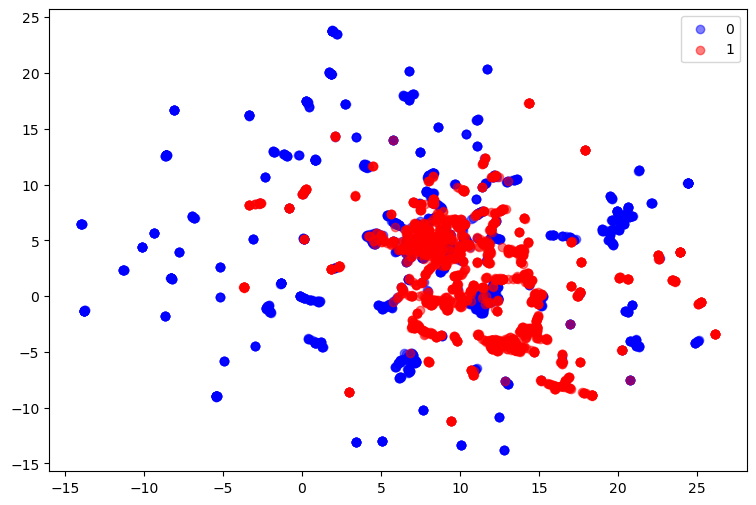

In [39]:
cdict = {1: 'red', 0: 'blue'}
fig, ax = plt.subplots(1, figsize=(9, 6))
unique_labels = tsne_df['label'].unique()
for g in unique_labels:
    data_subset = tsne_df[tsne_df['label'] == g]  # Filter data for each label
    ax.scatter(x=data_subset['Umap_1'], y=data_subset['Umap_2'], c=cdict[g], alpha=0.5, label=str(g))  # Add label to each scatter plot

ax.legend();

In [40]:
def try_embeddings(X, y, n ):
        embedding = umap.UMAP(n_neighbors=n, metric = 'jaccard').fit_transform(np.vstack(X))
        tsne_df = pd.concat([pd.DataFrame(embedding),pd.Series(y)], axis =1 )
        tsne_df.columns = ['Umap_1', 'Umap_2', 'label']
         
        return tsne_df
    

In [41]:
def scatterplot_tsne(df,title=''):
    cdict = {1: 'red', 0: 'blue'}
    fig, ax = plt.subplots(1, figsize=(9, 6))
    unique_labels = df['label'].unique()
    for g in unique_labels:
        data_subset = df[df['label'] == g]  # Filter data for each label
        ax.scatter(x=data_subset['Umap_1'], y=data_subset['Umap_2'], c=cdict[g], alpha=0.5, label=str(g))  # Add label to each scatter plot
        

    ax.legend()
    return fig, ax

In [42]:
mylst = []
for n in [5,10,15,20,50,100]:
    a = try_embeddings(X_train, y_train1, n)
    mylst.append(a)

/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; i

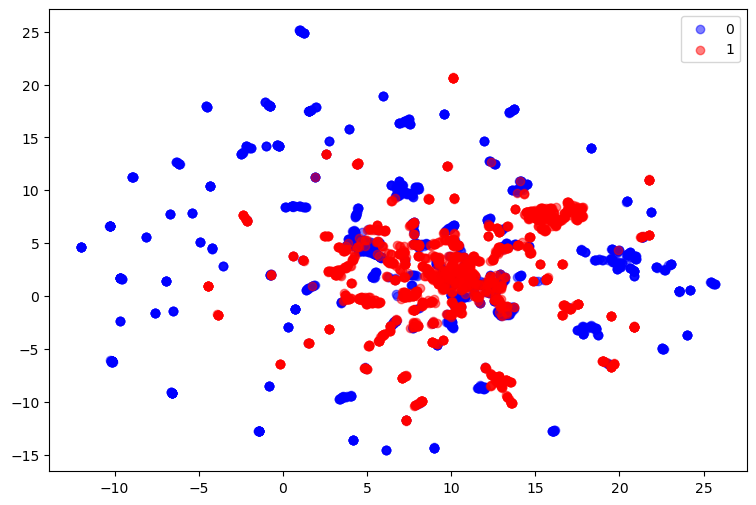

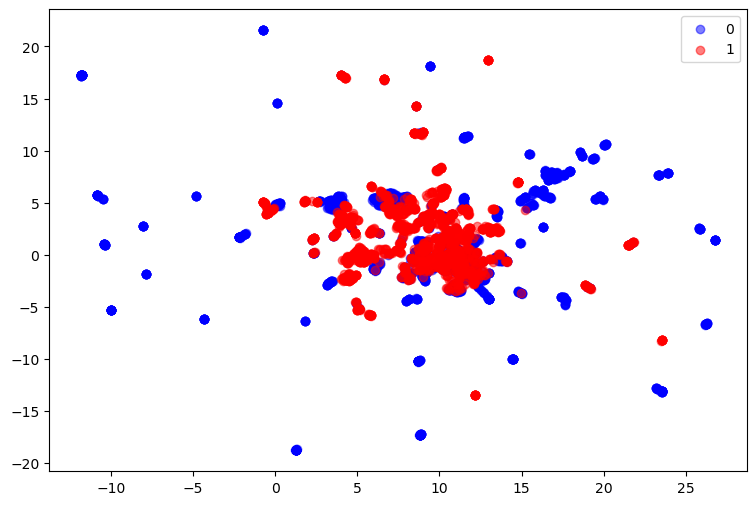

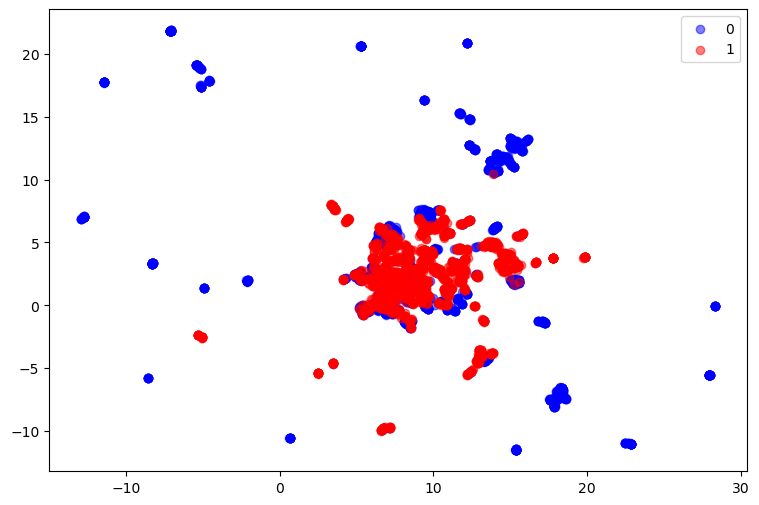

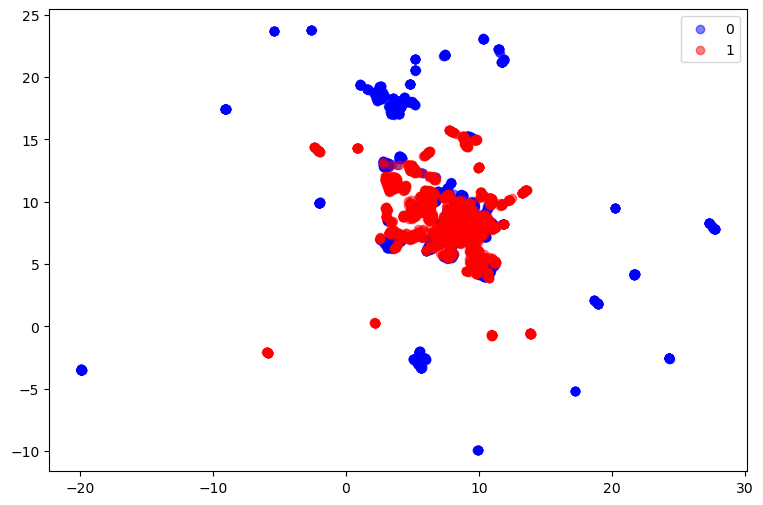

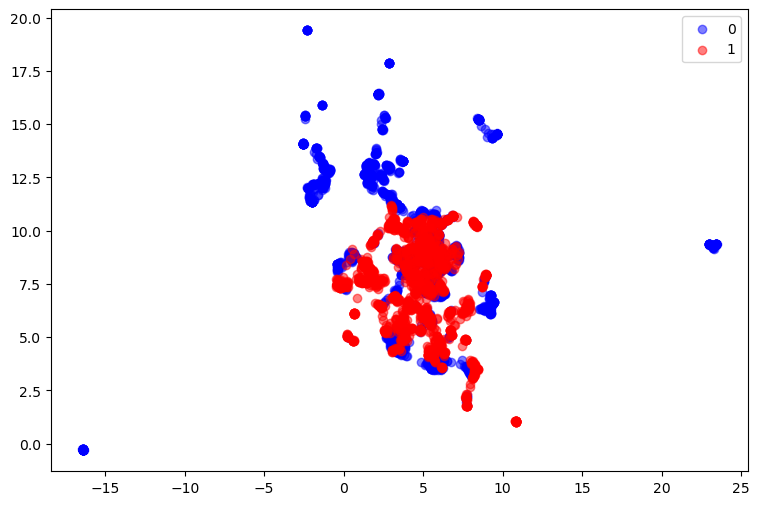

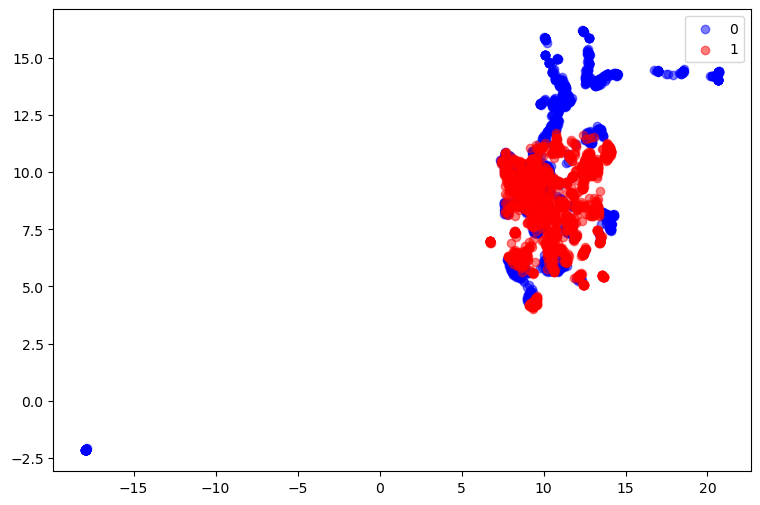

In [43]:
for e in mylst:
    scatterplot_tsne(e, title='n_neighbors = {}'.format(e))

In [44]:
def fit_embeddings(X, y, n ):
        mapper = umap.UMAP(n_neighbors=n, metric = 'jaccard').fit(np.vstack(X), y)
        fig, ax = plt.subplots(1, figsize=(14, 10))
        ax.scatter(*mapper.embedding_.T, c=y, cmap='Spectral', alpha=1.0)
        return mapper, fig, ax
    

/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


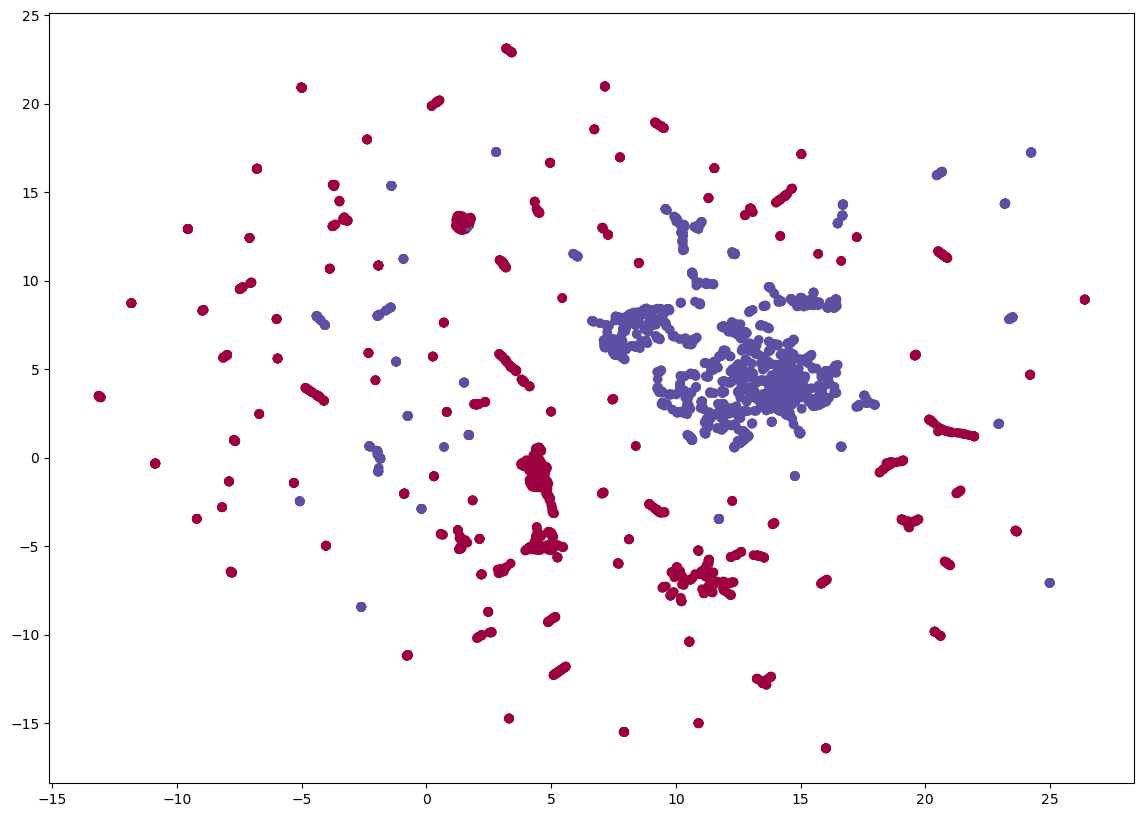

In [45]:
a, b, c = fit_embeddings(X_train, y_train1, n=5)


In [46]:
b.savefig(figures_dir+'train_embedding.png', dpi = 300)

In [47]:
def test_embeddings(mapper, X):
        test_embedding = mapper.transform(np.vstack(X))
        fig, ax = plt.subplots(1, figsize=(14, 10))
        ax.scatter(*test_embedding.T, c=y_test1, cmap='Spectral', alpha=1.0)
        return test_embedding, fig, ax
    

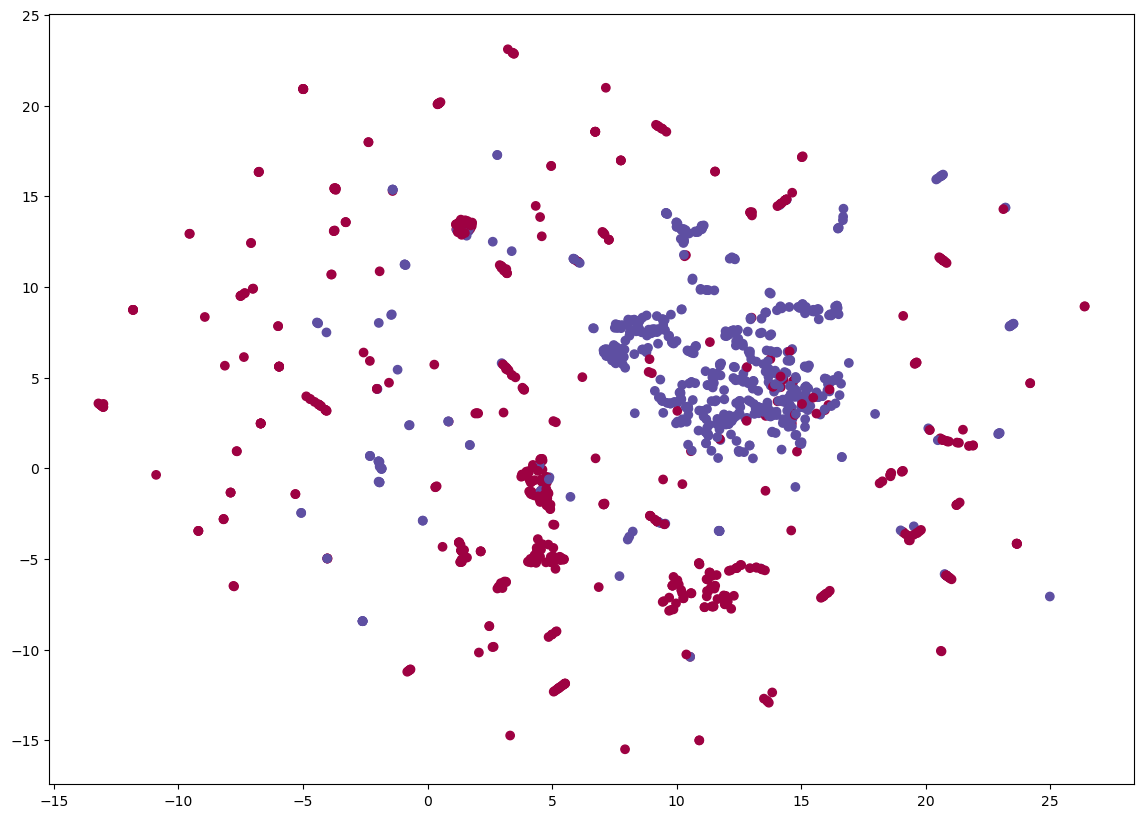

In [48]:
c, d, e = test_embeddings(a, X_test)

In [49]:
d.savefig(figures_dir+'test_embedding.png', dpi = 300)

In [50]:
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, f1_score, make_scorer, roc_auc_score, accuracy_score
from sklearn.metrics import auc, matthews_corrcoef
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [51]:
cv = StratifiedKFold(n_splits = 10)

In [52]:
scorer = make_scorer(balanced_accuracy_score)

In [53]:
class SupervisedUMAP:
    def __init__(self, n_neighbors=5, random_state=42, metric='jaccard'):
        self.n_neighbors = n_neighbors
        self.random_state = random_state
        self.metric = metric
        self.umap_transformer = None

    def fit(self, X, y):
        self.umap_transformer = umap.UMAP(n_neighbors=self.n_neighbors, random_state=self.random_state, metric=self.metric)
        self.umap_transformer.fit(X, y)
        return self

    def transform(self, X):
        if self.umap_transformer is None:
            raise ValueError("SupervisedUMAP has not been fitted yet.")
        return self.umap_transformer.transform(X)

In [54]:

classifier = SVC()

model = make_pipeline(SupervisedUMAP(), classifier)
# Step 4: Train pipeline on training data


In [55]:
model

Pipeline(steps=[('supervisedumap',
                 <__main__.SupervisedUMAP object at 0x7d8bac0fce80>),
                ('svc', SVC())])

In [56]:
model.fit(np.vstack(X_train), y_train1)

/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Pipeline(steps=[('supervisedumap',
                 <__main__.SupervisedUMAP object at 0x7d8bac0fce80>),
                ('svc', SVC())])

In [57]:
model.score(np.vstack(X_test), y_test1)

0.8667157584683358

Check the pipeline works

In [58]:
trans = umap.UMAP(n_neighbors=5, random_state=42, metric = 'jaccard').fit(np.vstack(X_train), y_train1)

/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [59]:
svc = SVC().fit(trans.embedding_, y_train1)

In [60]:
test_embedding = trans.transform(np.vstack(X_test))

In [61]:
svc.score(trans.transform(np.vstack(X_test)), y_test1)

0.8880706921944035

In [62]:
y_pred = svc.predict(trans.transform(np.vstack(X_test)))

In [63]:
balanced_accuracy_score(y_test1, y_pred)

0.8880706921944035

In [64]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


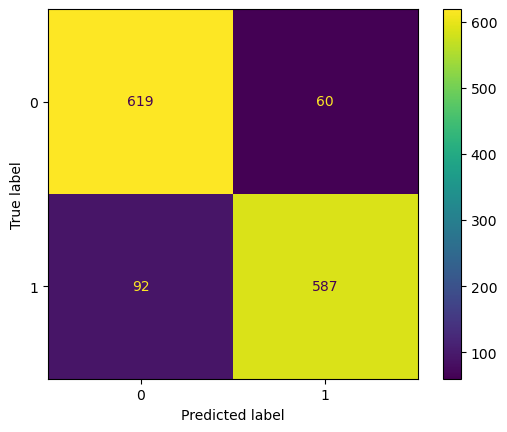

In [65]:
cm = confusion_matrix(y_test1, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

Trying it out as part of a CV routine

In [66]:
results = cross_validate(model, np.vstack(X_train), y_train1, cv=cv, scoring = scorer, return_train_score = True )

/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/gr

In [70]:
results['test_score'].mean(), np.std(results['test_score'])


(0.8880070993914808, 0.01717256937468341)

In [71]:
cv_results = pd.DataFrame(results)
cv_results

,fit_time,score_time,test_score,train_score
0,22.749337,4.505570,0.875000,0.936135
1,22.278672,4.640641,0.899510,0.938046
2,21.701472,4.687682,0.913950,0.954711
3,21.566208,4.626095,0.874505,0.942986
4,22.124623,5.184268,0.872102,0.930980
5,22.668533,4.643566,0.904194,0.944614
6,22.674135,4.640125,0.889452,0.900400
7,22.096268,4.683605,0.857602,0.922773
8,22.430084,4.677159,0.906706,0.927957
9,21.903470,4.747832,0.887050,0.942424


<Axes: ylabel='Frequency'>

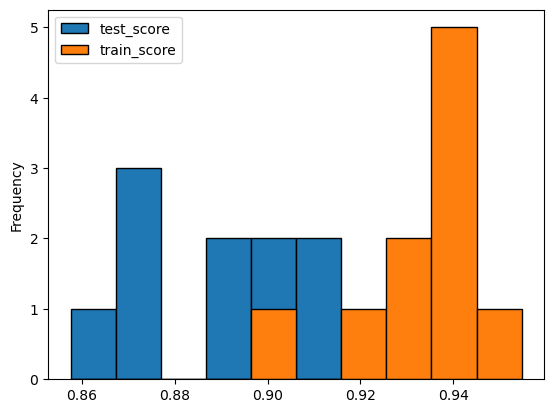

In [72]:
cv_results[['test_score', 'train_score']].plot.hist(edgecolor = 'black')

In [74]:
len(y_pred)

1358

In [75]:
len(y_test1)

1358

In [141]:
idx2

array([2994, 1542, 4362, ..., 5217, 1646, 5249])

In [161]:
df1 = df.copy()

df1.index = indices

In [164]:
idx2

array([2994, 1542, 4362, ..., 5217, 1646, 5249])

In [169]:
df1 = df1[df1.index.isin([e for e in idx2 if e in indices])]

In [172]:
df1 = df1.reindex(idx2)

In [94]:
len(idx1)

4072

In [142]:
idx2

array([2994, 1542, 4362, ..., 5217, 1646, 5249])

In [178]:
test_set = pd.DataFrame(list(zip(y_test1, y_pred, y_test)))

In [181]:
test_set.index = idx2
test_set

,0,1,2
2994,0,0,1
1542,1,1,-1
4362,0,0,1
4011,0,0,1
2699,1,1,-1
...,...,...,...
4540,0,0,1
3568,1,1,-1
5217,0,0,1
1646,1,1,-1


In [195]:
filtered = pd.concat([df1[['Target', 'Analogue', 'analogue_smi', 	'target_smi' ,'Label','label', 'tanimoto']], test_set], axis = 1)

In [196]:
filtered.columns = ['Target', 'Analogue', 'analogue_smi', 	'target_smi','Label', 'label', 'tanimoto', 'y_test1', 'y_pred', 'y_test']

In [197]:
pd.crosstab(filtered['Label'], filtered['y_pred'])

y_pred,0,1
Label,,
0,619,60
1,92,587


In [212]:
(60+92)/(619+587+92+60)

0.11192930780559647

<Axes: >

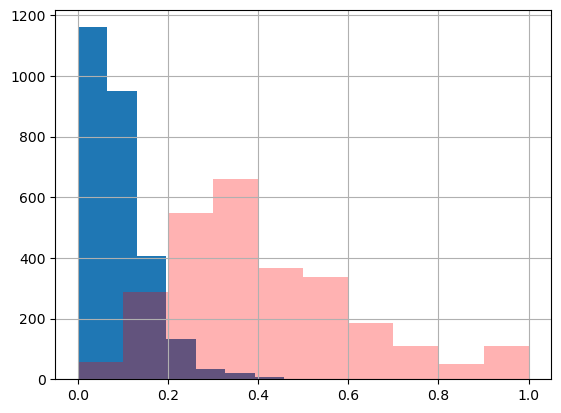

In [210]:
df[df['Label'] ==1]['tanimoto'].hist()
df[df['Label'] ==0]['tanimoto'].hist(color = 'r', alpha = 0.3)

<Axes: >

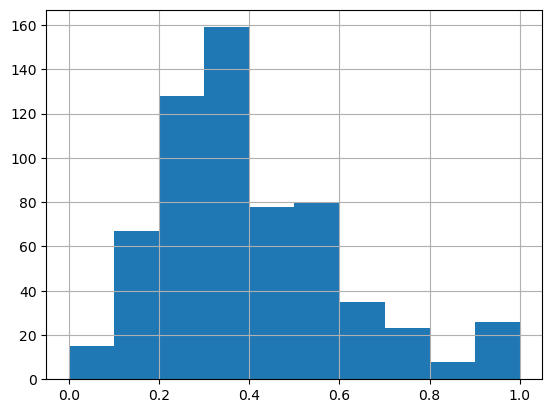

In [213]:
filtered[(filtered['Label'] ==  0) & ( filtered['y_pred'] == 0)]['tanimoto'].hist()

<Axes: >

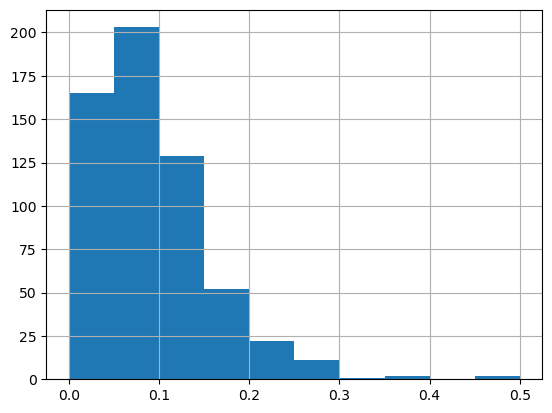

In [215]:
filtered[(filtered['Label'] ==  1) & ( filtered['y_pred'] == 1)]['tanimoto'].hist()

In [216]:
filtered.to_csv(interim_dir+'umap_svc_testset.csv')